In [315]:
#Social_Network_Ads.csv

**Import libraries**

In [316]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [317]:
df = pd.read_csv('Social_Network_Ads.csv')

In [318]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [319]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [320]:
df.drop(columns=["User ID","Gender"], inplace=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [321]:
y=df['Purchased'].values
x=df.drop(['Purchased'], axis=1)

In [322]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

In [323]:
print("x_train-shape : ", x_train.shape)
print("y_train-shape : ", y_train.shape)
print("x_test-shape : ", x_test.shape)
print("y_test-shape : ", y_test.shape)

x_train-shape :  (280, 2)
y_train-shape :  (280,)
x_test-shape :  (120, 2)
y_test-shape :  (120,)


In [324]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

**Feature Scaling**

In [325]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

**Fitting SVM to the Training set**

In [326]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear', gamma='scale')
SVM.fit(x_train, y_train) 

SVC(kernel='linear')

**Predicting the Test set results**

In [327]:
y_pred = SVM.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [328]:
df_new = pd.DataFrame({'True_Target': y_test, 'Predicted_target': y_pred})
df_new

,True_Target,Predicted_target
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
115,1,1
116,0,0
117,1,1
118,1,1


**Making the Confusion Matrix**

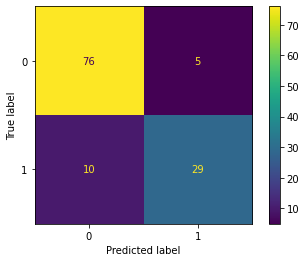

In [329]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
#viewing Confusion matrix in Testing set
cnf_matrix_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_test).plot()

**Visualising the Training set results**

In [330]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


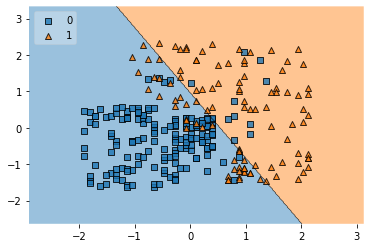

In [331]:
plot_decision_regions(x_train,y_train,clf = SVM,legend =2)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


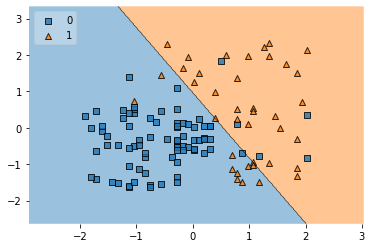

In [333]:
plot_decision_regions(x_test,y_test,clf = SVM,legend =2)

In [334]:
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred) 
print(F1_score)

0.7945205479452054
